In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [65]:
voltage_configs = np.loadtxt("../../data/cont_comparison/voltage_configs.csv")


## kmc data
kmc_means = np.zeros((200,16))
kmc_vars = np.zeros((200,16))
for i in range(200):
    try:
        states = np.loadtxt("../../data/cont_comparison/kmc/"+str(i)+"_.csv")
        mean = np.mean(states, axis = 0)
        mean_2 = np.mean(states ** 2, axis = 0)
        var = mean_2 - mean ** 2

        kmc_means[i] = mean
        kmc_vars[i] = var
    except: pass

valid = np.where(np.logical_and(kmc_means != 0, kmc_vars != 0))
valid = np.unique(valid[0])

## mf2 data
mf2_means = np.loadtxt("../../data/cont_comparison/mf2/mf_means.csv")
mf2_vars = np.loadtxt("../../data/cont_comparison/mf2/mf_vars.csv")

In [83]:
i = 2

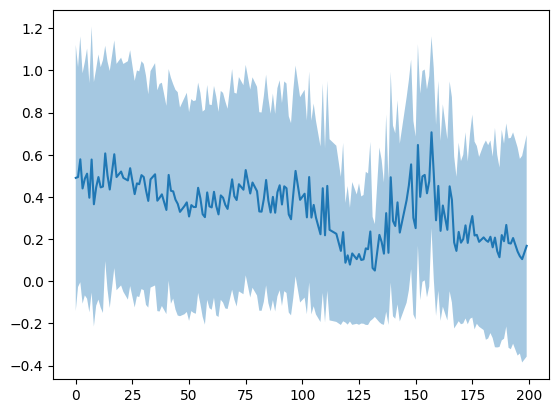

In [85]:
plt.plot(np.arange(200)[valid], kmc_means[:,i][valid], label = "means")
plt.fill_between(np.arange(200)[valid], kmc_means[:,i][valid] - np.sqrt(kmc_vars[:,i][valid]), kmc_means[:,i][valid] + np.sqrt(kmc_vars[:,i][valid]), alpha = 0.4)

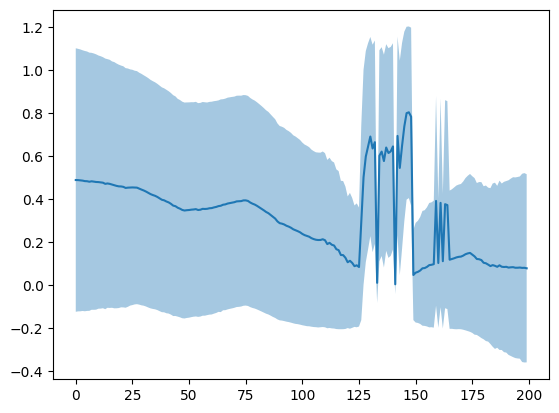

In [86]:
plt.plot(np.arange(200), mf2_means[:,i])
plt.fill_between(np.arange(200), mf2_means[:,i] - np.sqrt(mf2_vars[:,i]), mf2_means[:,i] + np.sqrt(mf2_vars[:,i]), alpha = 0.4)